<a href="https://colab.research.google.com/github/Mcdaddy-2pointoh/Blogs/blob/main/Standard_Deviation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
models_folder = '/content/drive/MyDrive/Models'
model_version = len(os.listdir(models_folder)) + 1
model_version

5

In [ ]:
df = {}
df = si.get_data('NG=F')
df = pd.DataFrame(df)
df = df [['open', 'close', 'high', 'low']].round(3)
df = df.resample('1D').mean()
df.interpolate(method='linear', axis = 0, inplace= True, limit_direction='forward')

In [ ]:
df.corr()

,open,close,high,low
open,1.000000,0.997655,0.998694,0.998890
close,0.997655,1.000000,0.998851,0.998907
high,0.998694,0.998851,1.000000,0.998250
low,0.998890,0.998907,0.998250,1.000000


In [ ]:
df_wk = df.resample('1M').mean()
print(df_wk)

                open     close      high       low
2000-08-31  4.735000  4.792500  4.842500  4.685000
2000-09-30  5.088056  5.122239  5.192406  5.023556
2000-10-31  5.112366  5.069688  5.183495  4.985914
2000-11-30  5.727667  5.800333  5.904333  5.656833
2000-12-31  8.755887  8.706976  9.043290  8.406048
...              ...       ...       ...       ...
2022-04-30  6.648472  6.721633  6.951917  6.474383
2022-05-31  8.134962  8.117871  8.456113  7.789629
2022-06-30  7.707600  7.597100  7.955067  7.341700
2022-07-31  7.016919  7.132629  7.379823  6.825403
2022-08-31  7.966800  7.935400  8.154400  7.704200

[265 rows x 4 columns]


In [ ]:
df_wk['std'] = df_wk['close'].rolling(10).std()

In [ ]:
df_wk = df_wk[9:]

In [ ]:
df_wk['std'].isna().sum()

0

In [ ]:
df_wk['close_max'] = df_wk['close'] + df_wk['std']
df_wk['close_mim'] = df_wk['close'] - df_wk['std']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_wk['gradient'] = np.gradient(df_wk['close'])
df_wk['d_gradient'] = np.gradient(df_wk['gradient'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_wk.drop(columns=['open', 'low','high','std'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [294]:
df_wk

,close,close_max,close_mim,gradient,d_gradient
2001-05-31,4.217532,5.642656,2.792409,-0.421032,-0.107306
2001-06-30,3.796500,5.328468,2.264532,-0.528339,-0.004181
2001-07-31,3.160855,4.884609,1.437101,-0.429395,0.045318
2001-08-31,2.937710,4.839914,1.035506,-0.437702,0.135520
2001-09-30,2.285450,4.391155,0.179745,-0.158355,0.348322
...,...,...,...,...,...
2022-04-30,6.721633,7.625484,5.817782,1.565419,-0.354376
2022-05-31,8.117871,9.438396,6.797346,0.437733,-1.029020
2022-06-30,7.597100,9.039993,6.154207,-0.492621,-0.134292
2022-07-31,7.132629,8.643016,5.622242,0.169150,0.647696


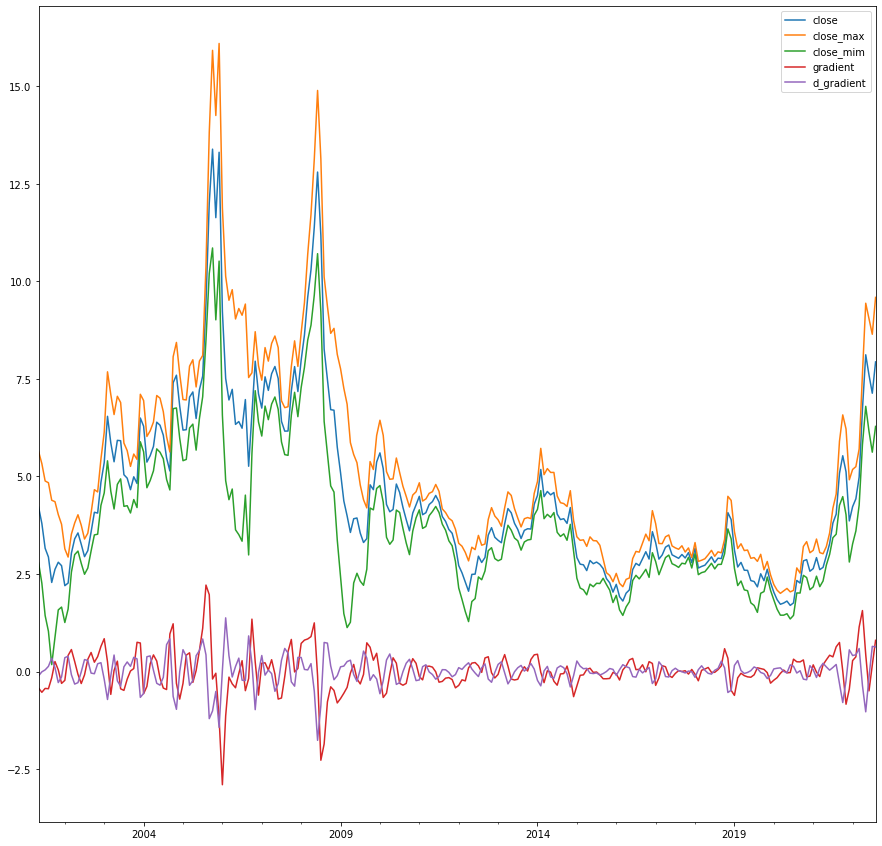

In [295]:
plt.figure(figsize=(15,15))
for key in df_wk.keys():
  df_wk[key].plot(label=key)

plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
scaler_mod = scaler.fit(df_wk)
df_wk_sc = scaler.transform(df_wk)

In [ ]:
df_wk_sc.shape

(256, 5)

In [ ]:
def batch_gen(df, size_x = 24, size_y = 12):
  X = []
  Y = []
  for i in range(size_x, len(df) - size_y):
    X.append(df[i-size_x:i])
    Y.append([item[0] for item in df[i:i+size_y]])

  X = np.array(X)
  Y = np.array(Y)
  return  X, Y

X, Y = batch_gen(df_wk_sc, 24, 12)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(176, 24, 5)
(44, 24, 5)
(176, 12)
(44, 12)


In [ ]:
from tensorflow import keras as k
from keras.layers import LeakyReLU, LSTM, ConvLSTM1D, Dropout, Dense, Input
from keras import backend as k_be

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return k_be.sqrt(k_be.mean(k_be.square(y_pred - y_true))) 

In [ ]:
model = k.Sequential()

In [ ]:
model.add(LSTM(50, activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, activation=LeakyReLU(alpha=0.1), return_sequences=True))
model.add(LSTM(50, activation=LeakyReLU(alpha=0.1), return_sequences=False))
model.add(Dropout(0.20))
model.add(Dense(Y_train.shape[1]))
model.compile(loss=root_mean_squared_error, optimizer= k.optimizers.Adam(learning_rate=0.01))
early_stopping = k.callbacks.EarlyStopping(monitor='loss', patience=10)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 24, 50)            11200     
                                                                 
 lstm_23 (LSTM)              (None, 24, 50)            20200     
                                                                 
 lstm_24 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 12)                612       
                                                                 
Total params: 52,212
Trainable params: 52,212
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size = 32, validation_split=0.2 , verbose = 1, callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 6s 249ms/step - loss: 2.2761 - val_loss: 0.9435
Epoch 2/100
5/5 [==============================] - 0s 74ms/step - loss: 1.0172 - val_loss: 1.0056
Epoch 3/100
5/5 [==============================] - 0s 76ms/step - loss: 1.0143 - val_loss: 0.9604
Epoch 4/100
5/5 [==============================] - 0s 53ms/step - loss: 0.9556 - val_loss: 0.8156
Epoch 5/100
5/5 [==============================] - 0s 53ms/step - loss: 0.8587 - val_loss: 0.7573
Epoch 6/100
5/5 [==============================] - 0s 45ms/step - loss: 0.7583 - val_loss: 0.7441
Epoch 7/100
5/5 [==============================] - 0s 47ms/step - loss: 0.7642 - val_loss: 0.7035
Epoch 8/100
5/5 [==============================] - 0s 48ms/step - loss: 0.6897 - val_loss: 0.6312
Epoch 9/100
5/5 [==============================] - 0s 45ms/step - loss: 0.6281 - val_loss: 0.6478
Epoch 10/100
5/5 [==============================] - 0s 45ms/step - loss: 0.6399 - val_loss: 0.6097
Epoch 11/100
5/5 [

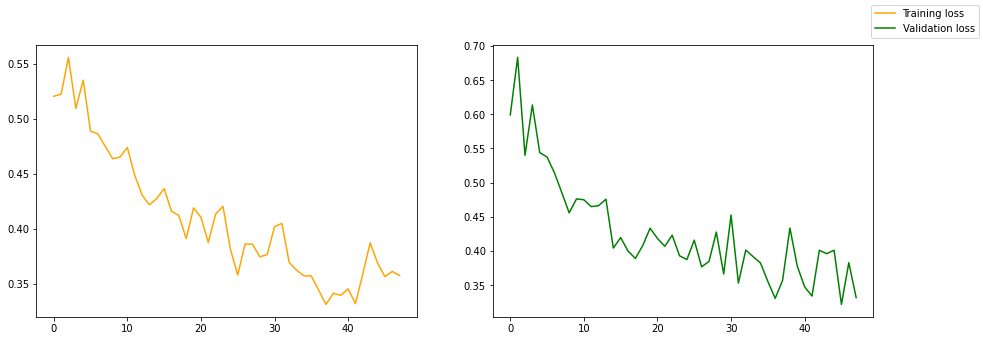

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
ax1.plot(history.history['loss'][20:], label='Training loss', c='orange')
ax2.plot(history.history['val_loss'][20:], label='Validation loss' , c = 'green')
fig.legend()
fig.show()

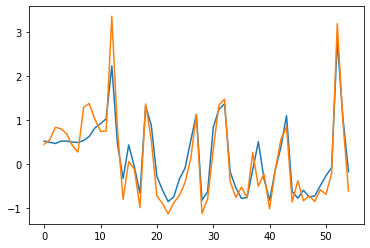

In [292]:
pred = model.predict(X_test)
pred_arr = []
for index , arr in enumerate(pred):
  if index == 0:
    pred_arr = list(arr)

  else:
    pred_arr.append(arr[-1])


plt.plot(pred_arr)
y_arr=[]

for index , arr in enumerate(Y_test):
  if index == 0:
    y_arr = list(arr)

  else:
    y_arr.append(arr[-1])


plt.plot(y_arr)

# pred = model.predict(X_test[0:2])
# print(pred)
# for i in range (2, len(X_test)):
#   model.predict()

In [ ]:
save_model = str(input('Do you want to save model[y/n]: '))
if save_model.lower() != 'n':
  model.save(f'/content/drive/MyDrive/Models/Model_V{model_version}')


Do you want to save model[y/n]: y
